In [1]:
%matplotlib inline

In [ ]:
import numpy as np
from numpy import random
from numpy.random import randn
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

## Smoothening code

In [3]:
movement_x = [517.933575724073, 507.4882744507468, 523.8384068938734, 469.7353659516171, 427.6803209373988, 429.2212530738949, 409.56906728793916, 411.08189320934866, 420.10327670240645, 433.46216073307966, 438.8295939549263, 448.77673924895765, 448.9143173929323, 441.67131018762143, 433.0251980322012, 438.34520646327513, 430.45095335016595, 434.08779084991295, 435.4292755917564, 424.2716774421652, 431.56296329794765, 421.72070043692315, 427.9560464651473, 437.8909886809828, 436.7664910351056, 435.27020864536104, 430.034127507185, 432.1536563221037, 414.89708065368967, 433.3843171905359, 423.4375632488665, 423.3673688661249, 421.2569478879938, 424.8470721467171, 427.2712865641697, 419.9616783023498, 416.99195426980447, 416.4292607282727, 421.3141920653032, 444.76516407388476, 463.14417389390377, 483.62556417988986, 486.9809125989212, 483.52071732437054, 489.6536001887346, 494.67753276923776, 497.1552913053048, 496.20878782914707, 509.02419016151225, 502.0115827649368, 497.3390490279914, 496.6705836162666, 452.31292803670453, 425.35739562672035, 386.737428180912, 329.1626292806833, 318.176123268246, 303.2786196377611, 301.3834780361986, 303.6300896362937, 302.41227224083144, 296.65307751591337, 300.0416019419932, 304.0758399765726, 307.7924422031857, 304.8404001819037, 306.3730071863362, 307.0827069060172, 312.67516773599414, 310.27806336397947, 309.14182514724337, 313.48754408446, 313.7576483691912, 315.23696029742143, 314.9295352283537, 312.8013255064969, 303.53837087364394, 269.790882644258, 235.90410855149975, 218.5090297244373, 187.17125808636757, 155.01749898485568, 136.4989275759366, 118.24196632661967, 102.57259131713234, 100.6046848593598, 87.53393400518387, 85.72729140365679, 82.94101379078286, 83.8957000890544, 84.21788981541451, 89.0070732393413, 85.74693907110183, 88.10926644913273, 93.51319327873269, 97.50336859510352, 101.59404141915276, 119.35031179319391, 135.28375180891757, 161.01429795971805, 171.73068189868036, 183.3558749658456, 204.83146034991802, 235.0644086926712, 264.9951440682683, 287.89534099361435, 298.08996329035784, 306.53961656007124, 308.3278122343547, 310.7139943177218, 310.80471691072296, 308.91067821127143, 306.22756641763476, 305.301626729224, 245.88919723589802, 204.04526903221642, 172.7836687947802, 126.34858146232644, 102.43799278773173, 92.68157840392749, 83.05162419926934, 84.08712476028678, 82.34259155747803, 86.81941353595317, 83.80868644912007, 91.1490247657262, 89.60812820671752, 115.22781490661937, 150.10415902409528, 315.04324087824847, 195.63722363407746, 212.7501018306752, 254.49729484597634, 276.660255076354, 298.2309568731278, 310.70011909761575, 314.21538832274126, 315.64190325959356, 314.7595815707982, 306.48496953934585, 267.04800067170294, 221.83794407029225, 210.35253495132366, 176.0310217506527, 164.80422538796853, 119.19983681001811, 96.49010396374321, 89.55278742498683, 85.08719903817448, 85.66854407750263, 86.14662545950301, 84.95719000465512, 88.30369741805477, 94.1082178619859, 162.69960354029206, 168.34532386898377, 212.4623155346806, 251.43601214947478, 277.12382973784605, 302.3843083356946, 310.75544209060274, 317.4320556956869, 317.9217798104558, 317.3990042098445, 312.871946819088, 297.1081135804171, 229.7228758816892, 195.68432822746314, 164.11147834105813, 120.29228803407342, 99.22599496001406, 93.68302241508206, 87.68708619429039, 83.95067620153871, 85.80750974348788, 88.2930330661912, 88.1916461213265, 91.90836397477382, 103.0572901117987, 133.26994149796084, 174.1653916749312, 195.39990400403275, 232.8509375221371, 284.92533234116945, 309.130369196284, 319.0819972537342, 326.9323121698409, 327.9059968464115, 326.69191508713163, 325.8870811660055, 313.7843314847798, 296.1142564684616, 245.59781761367086, 205.09487606700836, 179.5570175882448, 169.80280900866256, 115.15807413684271, 99.57285767392173, 94.88458089877903, 85.93382761268417, 87.01323079321668, 86.24171518908881, 87.2213146229482, 88.94853937811183, 96.58733723694796, 123.48960125384552, 178.8492746303736, 197.4697666464692, 227.44796239032644, 276.3675235096037, 305.41020922092576, 319.7533444419426, 323.1311778330432, 322.0061821023417, 319.4923479939989, 309.865364509543, 293.21807110247835, 255.34494627325026, 212.2023330451293, 188.60508419689117, 172.34389547239311, 118.55543956855418, 103.82980188557521, 101.15144858088517, 92.18159907840077, 89.21864366284305, 87.99717068054515, 87.48003411169496, 86.12353567014704, 89.04861885031269, 89.35529679214397, 95.95358655860386, 173.77288304462334, 178.65338498446607, 197.6426020805082, 215.19203383687864, 267.4540109584986, 282.5181417514623, 301.86512606131595, 310.5389886569482, 316.09718836650944, 318.4296484438249, 319.37469324299707, 316.14749493376576, 300.9530260155238, 250.2605319640797, 207.0248302400421, 183.9846181128309, 180.5816314381021, 144.54094288880341, 98.12990593786684, 86.78070522960603, 79.84683970713245, 79.82253138883125, 78.39047525830837, 79.00521866398154, 79.4822505101021, 76.21534772487502, 80.26172657704723, 79.94699922868007, 88.73379366385504, 108.11148134537929, 179.51526740672057, 184.21106882045922, 240.6067586315728, 284.4890100350652, 310.01486111181384, 320.03241425351155, 323.8268956001558, 312.47703670837717, 292.0213155795873, 253.96478880254713, 206.4154768237178, 189.81856113888438, 189.41746054535702, 112.90110059352736, 99.62868764610488, 89.86349451727199, 85.79942475946456, 84.73694756858707, 82.90363964021515, 81.84408869768053, 85.14292227789528, 84.47226885069219, 86.04178749835552, 97.76563693822357, 101.20678936261587, 170.11564185582293, 175.8492030010322, 182.74177195494656, 205.46594926112672, 251.99703354909627, 286.76632500683087, 313.693715624241, 319.6835769890503, 320.2055343074502, 321.3936445008905, 321.7785929151149, 328.86000717242143, 352.10736922031856, 407.9847306167523, 469.89984067610504, 498.03298792073144, 489.7437891194239, 481.32821908268903, 474.5343065014775, 470.7527753602655, 499.7742213115791, 486.1276932948611, 496.864729965289, 515.7815646631112, 492.9686393144834, 516.2776215706464, 500.77839589489554, 519.5256682875242, 520.7368326928331, 498.96280555527443, 523.6019589122712, 498.5338477890726, 497.9716879098526, 493.96559166784726, 489.341621201273, 528.9624901015524, 489.1707425290438, 490.66168829567073, 512.2161667581667, 523.6964171414548, 490.7699505899854, 491.63373640781856, 487.00642165742386, 521.2315020783577, 488.86676847625887, 512.5918294481662, 521.6254515969074, 507.3899738529185, 514.217293694847, 518.6867155559322, 518.0303464899408, 483.1046741861135, 487.5516822301044, 489.7557787326951, 492.1396482793778, 491.2914454010484, 490.07241837101276, 487.6697639109557, 516.6010209315799, 531.0410692284144, 487.9452048188046, 531.3868824064423, 518.7994606136658, 510.3780914464762, 503.63804318126614, 509.02251801960205, 498.58347838406735, 494.93870710461863, 514.429620139957, 525.4375082223527, 490.61867511334196, 491.15817213305536, 498.50510117921186, 526.4902104985529, 503.1535845346401, 500.5083271876518, 498.7674851491661, 497.95649632271085, 486.7650995600408, 524.6525265392244, 521.4753145998624, 491.37686694841926, 492.03540624114515, 490.89432948611557, 491.84478206338036, 491.26159588907666, 490.54915670286186, 527.8198479370749, 525.5423906553594, 495.5382945006375, 521.4844224366499, 499.7871359395239, 491.3582954999696, 525.2933482431995, 516.2293429201749, 492.563198267487, 492.2788629877752, 522.6537121392284, 493.5734210236702, 521.52462499747, 490.17349401286225, 527.6857919643579, 490.77336602878074, 488.8193792629736, 529.1569210704744, 489.84522053614796, 512.1908711645887, 523.2551139871073, 525.9253467302866, 478.5591520793697, 501.24250421869937, 527.4811858340248, 488.3277695413698, 509.39547682055536, 517.3719495071648, 529.71676841301, 532.8790733851299, 481.2456437343142, 495.16604724943323, 510.78588060764446, 524.2914150415925, 483.24463602174745, 525.136166903639, 517.1664539396454, 507.7028778550538, 518.6515649983302, 518.1295009474679, 509.9557866704278, 503.6974220078226, 505.4118655506193, 507.2845933350874, 501.072870758531, 493.0028292799243, 515.696356580665]

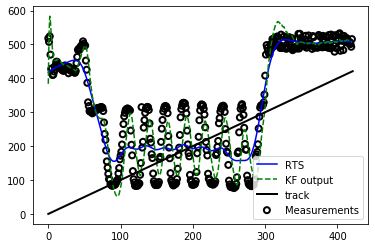

In [4]:

def plot_measurements(xs, ys=None, dt=None, color='k', lw=1, label='Measurements',
                      lines=False, **kwargs):
    """ Helper function to give a consistant way to display
    measurements in the book.
    """
    if ys is None and dt is not None:
        ys = xs
        xs = np.arange(0, len(ys)*dt, dt)

    plt.autoscale(tight=False)
    if lines:
        if ys is not None:
            return plt.plot(xs, ys, color=color, lw=lw, ls='--', label=label, **kwargs)
        else:
            return plt.plot(xs, color=color, lw=lw, ls='--', label=label, **kwargs)
    else:
        if ys is not None:
            return plt.scatter(xs, ys, edgecolor=color, facecolor='none',
                        lw=2, label=label, **kwargs),
        else:
            return plt.scatter(range(len(xs)), xs, edgecolor=color, facecolor='none',
                        lw=2, label=label, **kwargs),

def plot_rts(noise, Q=0.001, show_velocity=False):
    random.seed(123)
    fk = KalmanFilter(dim_x=2, dim_z=1)

    fk.x = np.array([0., 1.])      # state (x and dx)

    fk.F = np.array([[1., 1.],
                     [0., 1.]])    # state transition matrix

    fk.H = np.array([[1., 0.]])    # Measurement function
    fk.P = 10.                     # covariance matrix
    fk.R = noise                   # state uncertainty
    fk.Q = Q                       # process uncertainty

    # create noisy data
#     zs = np.asarray([t + randn()*noise for t in range (40)])
    zs = np.array(movement_x)

    # filter data with Kalman filter, than run smoother on it
    mu, cov, _, _ = fk.batch_filter(zs)
    M, P, C, _ = fk.rts_smoother(mu, cov)

    # plot data
    if show_velocity:
        index = 1
        print('gu')
    else:
        index = 0
    if not show_velocity:
        plot_measurements(zs, lw=1)
    plt.plot(M[:, index], c='b', label='RTS')
    plt.plot(mu[:, index], c='g', ls='--', label='KF output')
    if not show_velocity:
        N = len(zs)
        plt.plot([0, N], [0, N], 'k', lw=2, label='track') 
    plt.legend(loc=4)
    plt.show()
    return plt, M[:, index], mu[:,index]
    
plt, M, mu = plot_rts(7.)

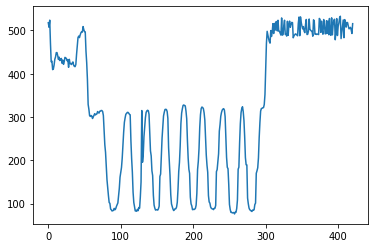

In [12]:
plt.plot(movement_x)

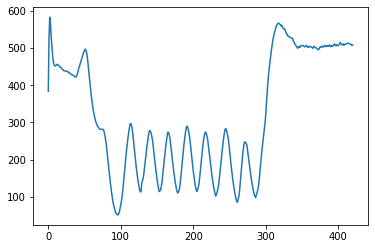

In [14]:
plt.plot(mu)

## Normalizing code

In [61]:
nose = 0
l_s = 5
r_s = 6

In [58]:
frame1 = [[  275.0131479701179 ,  292.9621266577528 ,  0.9995843768119812  ],
[  240.34722164168892 ,  257.6576252675427 ,  0.9999656677246094  ],
[  312.1272727877249 ,  257.7205262653568 ,  0.9999102354049683  ],
[  199.84849554277116 ,  268.50979068736336 ,  0.9436841011047363  ],
[  362.3378737631475 ,  276.42030271223786 ,  0.9991366267204285  ],
[  106.5428647289944 ,  415.3967664649449 ,  0.9508297443389893  ],
[  478.61354237122293 ,  435.4316592834156 ,  0.9468998908996582  ],
[  -25.51596983675836 ,  490.6097807414791 ,  0.09120850265026093  ],
[  -30.343185721668306 ,  486.8123108858889 ,  0.0292374175041914  ],
[  -71.32119216622084 ,  474.6793559178169 ,  0.04728594049811363  ],
[  -55.16986487718873 ,  467.31695066461907 ,  0.019408809021115303  ],
[  -32.12165992825885 ,  394.3391276147081 ,  0.003148701274767518  ],
[  -39.060715968506884 ,  386.1896416066224 ,  0.004211238585412502  ],
[  -47.592575845087595 ,  374.68747549106416 ,  0.001032984466291964  ],
[  -38.33769873236872 ,  374.66399434934624 ,  0.0014126305468380451  ],
[  121.68985495956952 ,  376.3696502527425 ,  0.000652896414976567  ],
[  -46.99545252462315 ,  393.9782295820009 ,  0.0007321679149754345  ]]

In [59]:
frame2 = [[  256.33614079219353 ,  191.90864958293696 ,  0.99915611743927  ],
[  194.46736780307634 ,  125.67794582386708 ,  0.9997487664222717  ],
[  323.28288441223856 ,  130.00629405283556 ,  0.9998164176940918  ],
[  131.2731819598127 ,  116.07413217811386 ,  0.6894515156745911  ],
[  410.4500646925158 ,  127.96604966870242 ,  0.9876934289932251  ],
[  63.229622332502345 ,  330.1077096573429 ,  0.9714134931564331  ],
[  475.6035324868525 ,  349.69791946015823 ,  0.9770300388336182  ],
[  -26.34956282678752 ,  492.07418570246716 ,  0.0989043191075325  ],
[  643.710245392202 ,  483.34457318399853 ,  0.1692851036787033  ],
[  -30.89756068366978 ,  489.3932085580776 ,  0.035197749733924866  ],
[  -17.078512585116755 ,  493.06192348658107 ,  0.012769295834004879  ],
[  193.37162050477258 ,  486.2930930340228 ,  0.007284821476787329  ],
[  -3.2534797163789335 ,  476.0048307903072 ,  0.009033691138029099  ],
[  518.6470327414427 ,  476.28084093795536 ,  0.0012347088195383549  ],
[  -16.535964668956694 ,  303.5793205617005 ,  0.0012622845824807882  ],
[  -49.39156926374028 ,  292.9790259642922 ,  0.0007034775335341692  ],
[  -43.83634883420484 ,  297.41735310134493 ,  0.0009334247442893684  ]]


In [60]:
frame3 = [[  301.7153222941239 ,  240.24550482399104 ,  0.9984473586082458  ],
[  270.33327142737716 ,  210.6720563661249 ,  0.9997155070304871  ],
[  340.17238679284713 ,  216.8632151549344 ,  0.999954342842102  ],
[  228.66430901553377 ,  227.6844637381598 ,  0.8254632353782654  ],
[  387.4407073143391 ,  244.12973038273154 ,  0.9893535375595093  ],
[  124.19736679611498 ,  397.58365216032826 ,  0.9638024568557739  ],
[  466.0998153983387 ,  393.0282395120729 ,  0.9860217571258545  ],
[  -61.17230438351169 ,  278.00351869257 ,  0.25097745656967163  ],
[  595.8745912559301 ,  491.96908980453566 ,  0.32925647497177124  ],
[  182.69129937910384 ,  41.03375321225181 ,  0.620276689529419  ],
[  180.73880372993676 ,  41.07061148925148 ,  0.23455673456192017  ],
[  388.39226796191025 ,  142.26259616990163 ,  0.007727263029664755  ],
[  440.463900911205 ,  495.3646407843871 ,  0.008756163530051708  ],
[  -46.574523688290355 ,  287.6991667278072 ,  0.012242925353348255  ],
[  -49.81356680903457 ,  214.08500473734009 ,  0.010206520557403564  ],
[  430.0618359754985 ,  -11.23675472378113 ,  0.008784528821706772  ],
[  436.84252715945706 ,  -10.396314408495018 ,  0.00860412698239088  ]]

In [69]:
frame4 = [[  155.22907705344113 ,  46.586287206936376 ,  0.9141600728034973  ],
[  146.32947442318215 ,  34.966724277160324 ,  0.8502469658851624  ],
[  160.56403656599582 ,  36.12156062546171 ,  0.8565877676010132  ],
[  158.15751772631927 ,  46.17585197013894 ,  0.9099494218826294  ],
[  146.86607319278937 ,  42.425086461200614 ,  0.7461646795272827  ],
[  219.3890908089129 ,  119.55478450794911 ,  0.9595859050750732  ],
[  106.15303532344353 ,  122.8808793379235 ,  0.968828558921814  ],
[  261.9205726000121 ,  192.07342671606824 ,  0.9390490651130676  ],
[  96.06549143512888 ,  217.41815280420172 ,  0.9214441180229187  ],
[  283.89280136642753 ,  252.4631342121974 ,  0.8880259990692139  ],
[  88.95825622796082 ,  302.1048827492511 ,  0.9019966125488281  ],
[  219.4312691892631 ,  305.0253319616762 ,  0.9435614943504333  ],
[  139.7038707213643 ,  302.05834739566467 ,  0.972614586353302  ],
[  238.41581518269697 ,  458.55844922633986 ,  0.8340226411819458  ],
[  149.25958940676674 ,  454.4707382281209 ,  0.9214348196983337  ],
[  270.42482416175216 ,  483.21151338093017 ,  0.03935306519269943  ],
[  148.50119790400043 ,  499.90966480630664 ,  0.06066585332155228  ]]

In [70]:
frame5 = [[  201.768965546723 ,  105.34926300839439 ,  0.9096159934997559  ],
[  192.82023792786356 ,  98.84907816358181 ,  0.9022300243377686  ],
[  208.95653204416948 ,  99.28608533631952 ,  0.8313325047492981  ],
[  176.2236508618069 ,  104.51185789750647 ,  0.9301698803901672  ],
[  219.7482482672665 ,  101.34864569945655 ,  0.575724184513092  ],
[  158.41824708931176 ,  166.2012110102362 ,  0.9785120487213135  ],
[  252.52658520412814 ,  163.5671249943076 ,  0.9690670967102051  ],
[  141.66901275991 ,  246.43399530124168 ,  0.9720112681388855  ],
[  289.0555562416403 ,  243.7209094744272 ,  0.7698398232460022  ],
[  136.8699751679535 ,  304.77796169142647 ,  0.8512910008430481  ],
[  291.2738398095513 ,  297.2474883875081 ,  0.6208686232566833  ],
[  183.37758865059578 ,  307.35426986773393 ,  0.9763501286506653  ],
[  245.31012794108705 ,  308.5609159321365 ,  0.9536193609237671  ],
[  221.38551039640078 ,  441.1730474758642 ,  0.9017684459686279  ],
[  223.03595326939444 ,  442.45650533567436 ,  0.8710244297981262  ],
[  218.02826806450628 ,  506.42966631162966 ,  0.20345477759838104  ],
[  235.36329739937986 ,  503.9869516007023 ,  0.239833265542984  ]]

In [71]:
frame6 = [[  185.813710728508 ,  174.1806899945353 ,  0.9552549719810486  ],
[  178.02225242050702 ,  167.2018989997824 ,  0.9548555016517639  ],
[  191.08080722200265 ,  166.3060400770118 ,  0.95429927110672  ],
[  167.7154807005411 ,  171.0768566230418 ,  0.8875605463981628  ],
[  197.27201635457197 ,  172.90513033693935 ,  0.7250382900238037  ],
[  153.8898778536904 ,  223.50846720483017 ,  0.9046368598937988  ],
[  220.9474465930508 ,  221.1195812324168 ,  0.9582173228263855  ],
[  143.57890254514223 ,  292.83612898594356 ,  0.4581228196620941  ],
[  245.48432750182388 ,  280.76378026774506 ,  0.6292747855186462  ],
[  137.75885603492821 ,  347.0333435374838 ,  0.35822659730911255  ],
[  134.97900153134117 ,  347.8063356073409 ,  0.575806736946106  ],
[  175.47284719266776 ,  344.23780688350064 ,  0.8704572319984436  ],
[  183.95946505654183 ,  346.83240188835816 ,  0.8323028087615967  ],
[  175.63757086727867 ,  434.2406317360043 ,  0.8231874704360962  ],
[  232.16497209007173 ,  432.10292282499796 ,  0.8359637260437012  ],
[  200.98599373784043 ,  500.09164365462067 ,  0.305049866437912  ],
[  255.38238929125117 ,  498.0732972140139 ,  0.38685446977615356  ]]

In [85]:
mov = np.array(frame6)
mov_2 = mov[mov[:,2] > 0.5]

# input data
ins = [mov[nose][0:2], mov[l_s][0:2], mov[r_s][0:2]]  # <- points
out = [[0,1], [-1, 0], [1, 0]] # <- mapped to
# calculations
l = len(ins)
B = np.vstack([np.transpose(ins), np.ones(l)])
D = 1.0 / np.linalg.det(B)
entry = lambda r,d: np.linalg.det(np.delete(np.vstack([r, B]), (d+1), axis=0))
M = [[(-1)**i * D * entry(R, i) for i in range(l)] for R in np.transpose(out)]
A, t = np.hsplit(np.array(M), [l-1])
t = np.transpose(t)[0]
# output
print("Affine transformation matrix:\n", A)
print("Affine transformation translation vector:\n", t)
# unittests
print("TESTING:")
for p, P in zip(np.array(ins), np.array(out)):
  image_p = np.dot(A, p) + t
  result = "[OK]" if np.allclose(image_p, P) else "[ERROR]"
  print(p, " mapped to: ", image_p, " ; expected: ", P, result)

new_out = np.array([np.dot(A,p) + t for p in mov[:,:2]])
new_out = new_out[mov[:,2] > 0.5]


Affine transformation matrix:
 [[ 0.02978973 -0.0009933 ]
 [-0.00073924 -0.02075097]]
Affine transformation translation vector:
 [-5.3623264   4.75178005]
TESTING:
[185.81371073 174.18068999]  mapped to:  [-9.76996262e-15  1.00000000e+00]  ; expected:  [0 1] [OK]
[153.88987785 223.5084672 ]  mapped to:  [-1.00000000e+00  7.10542736e-15]  ; expected:  [-1  0] [OK]
[220.94744659 221.11958123]  mapped to:  [1.00000000e+00 7.99360578e-15]  ; expected:  [1 0] [OK]


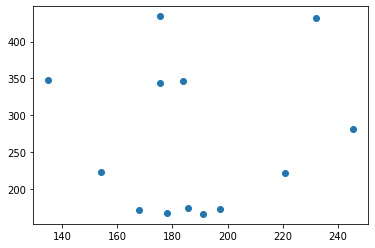

In [86]:
plt.scatter(mov_2[:, 0], mov_2[:,1])

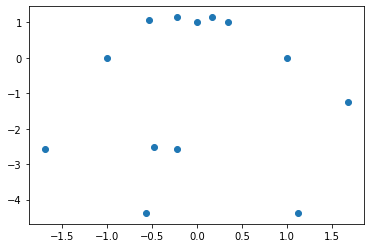

In [87]:
plt.scatter(new_out[:,0], new_out[:,1])

In [32]:
new_out

array([[ 1.27857796, -2.11513498],
       [ 1.11624486, -1.86086689],
       [ 1.50481571, -1.8319539 ],
       [ 0.88919388, -1.95997169],
       [ 1.76322915, -1.95359134],
       [ 0.27857796, -3.11513498],
       [ 2.27857796, -3.11513498]])